In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Agrupa las observaciones de la tabla descargada mediante el algoritmo de K-Medias sin realizar ningún tipo de transformación de los datos originales. Para dicho efecto, determina el número óptimo de clusters tanto por el criterio del gráfico de codo así como por el indicador Silhouette.

In [4]:
fields = data.iloc[:, [0,1,2,3]].values
fields

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
wcss = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters=index, init='k-means++', random_state=2)
    kmeans.fit(fields)
    wcss.append(kmeans.inertia_)

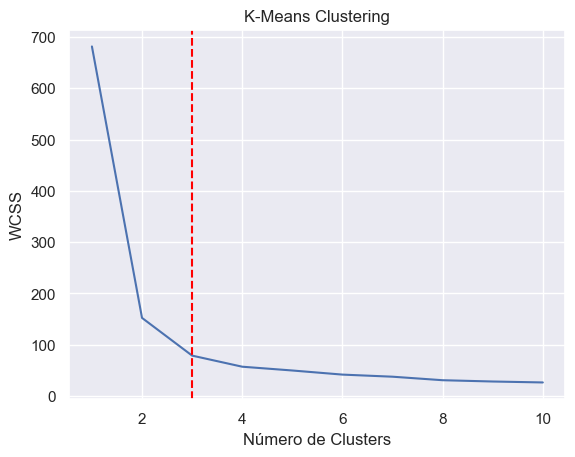

In [6]:
# Graficación del "Codo de Jambú"

sns.set_theme()
plt.plot(range(1, 11), wcss)
plt.axvline(x=3, color='red', linestyle='--')
plt.title('K-Means Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Weighted Cluster Sum of Squares
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_values = kmeans.fit_predict(fields) # Predicción de los clusters
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


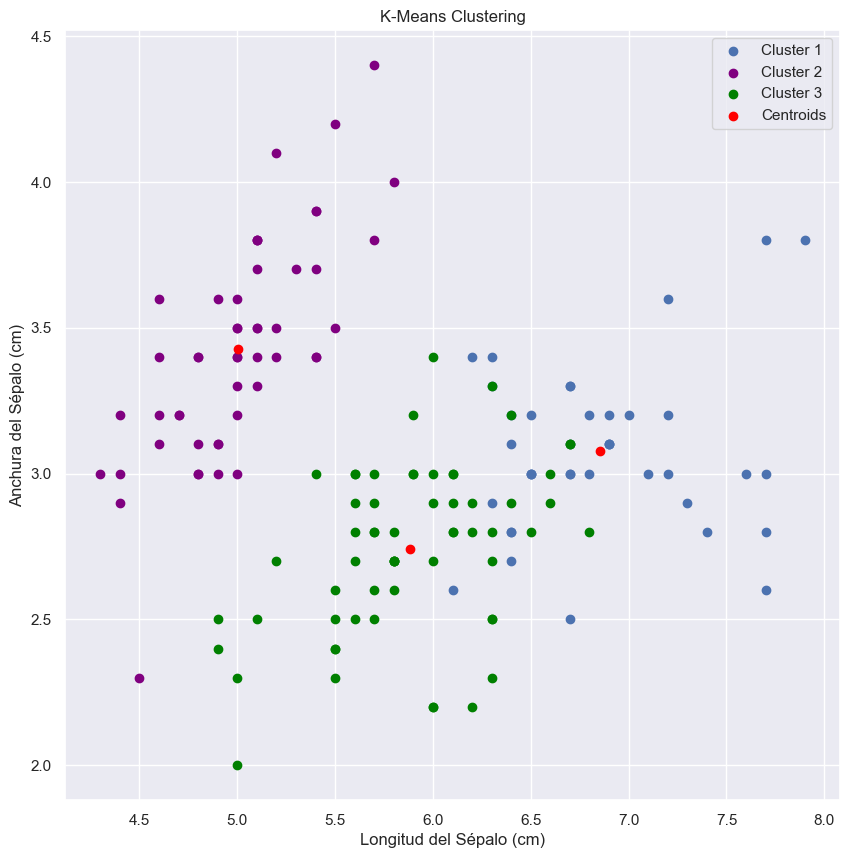

In [8]:
# Graficación de los clusters

plt.figure(figsize=(10, 10))
plt.scatter(fields[cluster_values == 0, 0], fields[cluster_values == 0, 1], c='b', label='Cluster 1')
plt.scatter(fields[cluster_values == 1, 0], fields[cluster_values == 1, 1], c='purple', label='Cluster 2')
plt.scatter(fields[cluster_values == 2, 0], fields[cluster_values == 2, 1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Anchura del Sépalo (cm)')
plt.legend()

#### Localizar el número optimo de cluster

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = data.iloc[:, [0,1,2,3]].to_numpy()
max_score = -1
best_j = 0

for j in range(2, 8):
    kmeans = KMeans(n_clusters=j, init='k-means++', random_state=42)
    kmeans.fit_predict(x)
    # Calculamos el Silhouette Score
    score = silhouette_score(x, kmeans.labels_, metric='euclidean')
    print('Número de clusters =', j, 'Silhouette Score =', score)
    
    if score > max_score:
        max_score = score
        best_j = j

print('\nEl mejor número de clusters es =', best_j, 'con un Silhouette Score de =', max_score)

Número de clusters = 2 Silhouette Score = 0.6810461692117465
Número de clusters = 3 Silhouette Score = 0.5511916046195927
Número de clusters = 4 Silhouette Score = 0.49764331793219296
Número de clusters = 5 Silhouette Score = 0.4930804067193529
Número de clusters = 6 Silhouette Score = 0.36784649847122536
Número de clusters = 7 Silhouette Score = 0.3542978877198859

El mejor número de clusters es = 2 con un Silhouette Score de = 0.6810461692117465


#### Repite el ejercicio anterior después de haber transformado tus datos originales a dos columnas, mediante reducción por PCA. Gráfica los grupos obtenidos considerando las dos dimensiones resultantes.

In [10]:
fields2 = data.iloc[:, [0,1,2,3]].values
fields2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Se realiza la reducción de dimensionalidad con PCA
pca = decomposition.PCA(n_components=2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [12]:
wcss2 = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters=index, init='k-means++', random_state=2)
    kmeans.fit(fields2)
    wcss2.append(kmeans.inertia_)

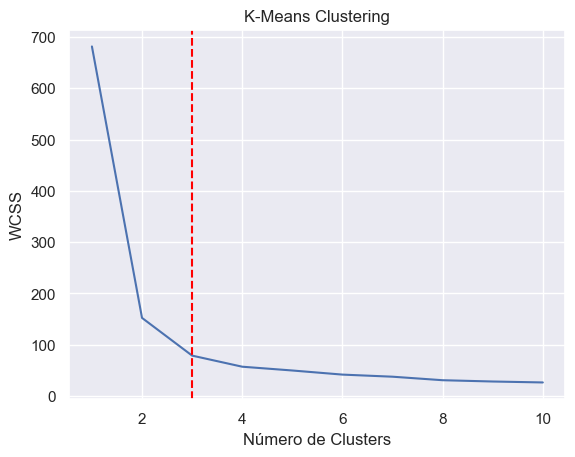

In [16]:
# Graficación del "Codo de Jambú"

sns.set_theme()
plt.plot(range(1, 11), wcss)
plt.axvline(x=3, color='red', linestyle='--')
plt.title('K-Means Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Weighted Cluster Sum of Squares
plt.show()

In [14]:
# Realizar la predicción de los clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_values = kmeans.fit_predict(fields2) # Predicción de los clusters
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


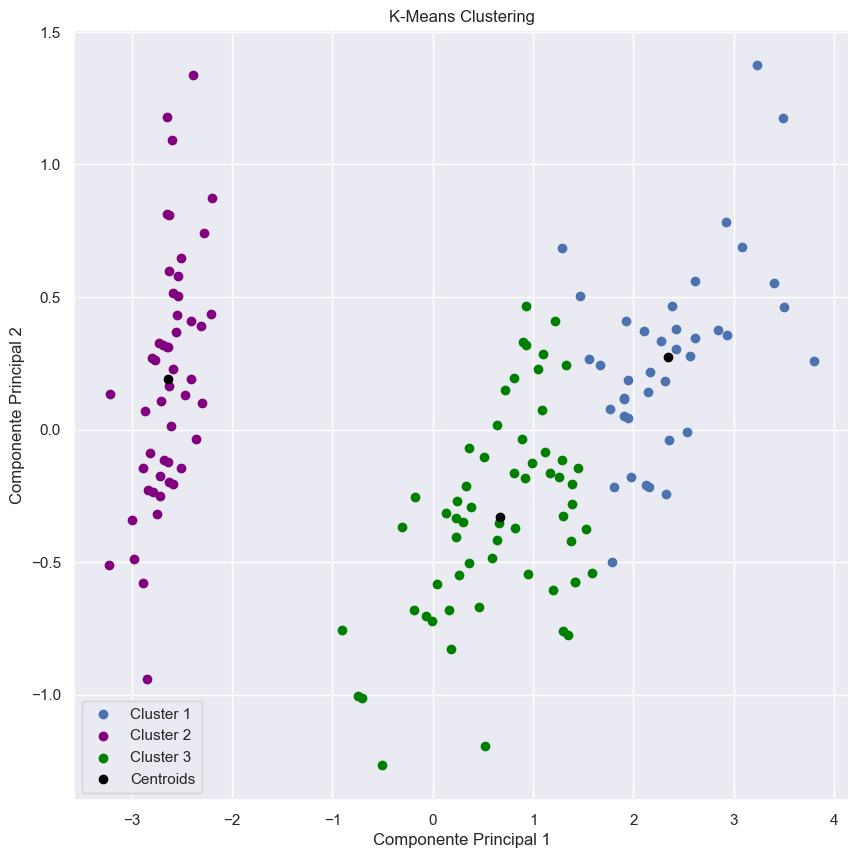

In [15]:
# Graficación de los clusters con centroides

plt.figure(figsize=(10, 10))
plt.scatter(fields2[cluster_values == 0, 0], fields2[cluster_values == 0, 1], c='b', label='Cluster 1')
plt.scatter(fields2[cluster_values == 1, 0], fields2[cluster_values == 1, 1], c='purple', label='Cluster 2')
plt.scatter(fields2[cluster_values == 2, 0], fields2[cluster_values == 2, 1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()